In [1]:
#Importamos las librerias que se van a emplear en el codigo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Defición de funciones necesarias

La siguiente función "Caminata_aleatoria(N) se encarga de hacer la simulación de la posición final en la cual se posiciona la particula una vez se realiza una cantidad N de pasos


In [2]:
def caminata_aleatoria(cantidad_de_pasos): #Función para simulación de caminata aleatoria
    r = 0   #posición inicial

    for i in range(1, cantidad_de_pasos+1): #avance para cada uno de los pasos
        
        decision =  np.random.uniform()
        paso = 1
        if decision > 0.5:
            paso = 1
        else:
            paso = -1
        r += paso #actualización de la posición
    return r

La siguiente función "Generacion_de_caminatas(cantidad_caminatas) se encarga de simular una cantidad M de caminatas aleatorias diferentes, esto con el objetivo de realizar estadisticas sobre este proceso aleatorio

In [8]:
#Generar estadistica de los pasos realizados en la caminata aleatoria 

def Generacion_de_caminatas(cantidad_caminatas, cantidad_de_pasos): #Funcion para generar un array de multiples posiciones

    vector_de_posicionamiento = np.zeros(cantidad_caminatas) #array de los valores de r

    for i in tqdm(range(cantidad_caminatas)): #correr la función M veces
        r = caminata_aleatoria(cantidad_de_pasos)
        vector_de_posicionamiento[i] = r
    return vector_de_posicionamiento

La siguiente función "evaluacion_teorica_de_caminata_aleatoria(promedio, std, x)" se encarga de evaluar de forma teorica la distribución de probabilidad que tiene la caminata aleatoria dada una cantidad definida de pasos 

In [9]:
#teorema del límite central
def evaluacion_teorica_de_caminata_aleatoria(promedio, std, x):

    funcion = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - promedio) / std)**2) #Definición de la función Gaussiana
    return funcion

## Evaluación de simulación

In [57]:
#Generamos la simulación de los datos
cantidad_caminatas = 50000   #Cantidad de caminatas aleatorias que se van a simular 
cantidad_de_pasos = 1000 #Cantidad de pasos realizados
Datos = Generacion_de_caminatas(cantidad_caminatas, cantidad_de_pasos)

100%|██████████| 50000/50000 [02:30<00:00, 331.32it/s]


In [58]:
#Se crean los datos que provienen de la solución teorica de la caminata aleatoria dada una cantidad especifica de pasos
rango = np.linspace(-150, 150, 1000)
evaluacion = np.zeros(len(rango))
posicion = 0
for i in tqdm(rango):
    dato = evaluacion_teorica_de_caminata_aleatoria(0, 2*np.sqrt(cantidad_de_pasos/4), i)
    evaluacion[posicion] = dato
    posicion += 1
evalucion = np.array(evaluacion)

100%|██████████| 1000/1000 [00:00<00:00, 136970.28it/s]


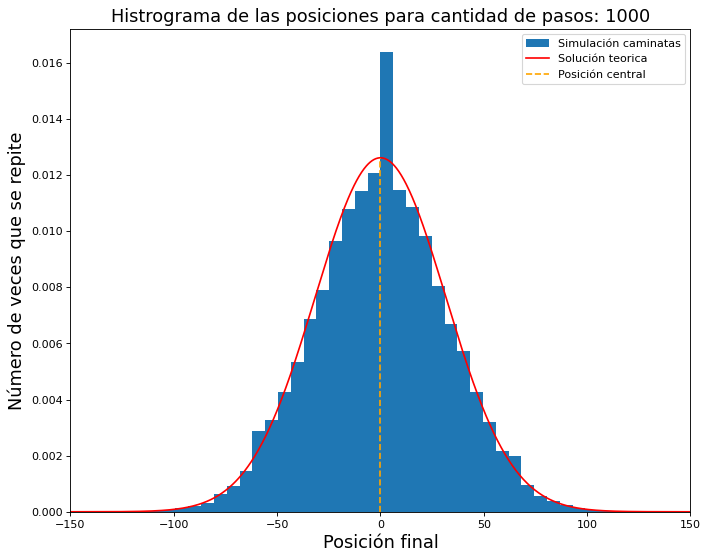

In [60]:
#creamos el histograma de R
plt.figure(figsize=(10,8), dpi = 80)
plt.hist(Datos, density=True, bins = 40, label='Simulación caminatas')
plt.xlim(-150, 150)
plt.plot(rango, evaluacion, label='Solución teorica', color = "red")
plt.title(f'Histrograma de las posiciones para cantidad de pasos: {cantidad_de_pasos}', fontsize = 16)
plt.xlabel('Posición final', fontsize = 16)
plt.ylabel('Número de veces que se repite', fontsize = 16)
plt.vlines(x = 0, ymin = 0, ymax = 0.0126, color = "Orange", linestyle = "--", label = "Posición central")
plt.legend()

## PUNTO 8

In [65]:
N_array = np.linspace(50, 1000, num=20) #array de valores de N que vamos a utilizar
Prom_r = np.zeros(20) #Array de promedio de r (<r>)
Prom_r2 = np.zeros(20) #Array de promedio de r^2 (<r^2>)

#calculamos r para cada uno de los valores de N
for i in range(20):
    N = int(N_array[i])
    M = 1000
    
    R = Generacion_de_caminatas(M, N)
    R_2 = R*R

    Prom_r[i] = np.mean(R)
    Prom_r2[i] = np.mean(R_2)

100%|██████████| 1000/1000 [00:02<00:00, 339.08it/s]


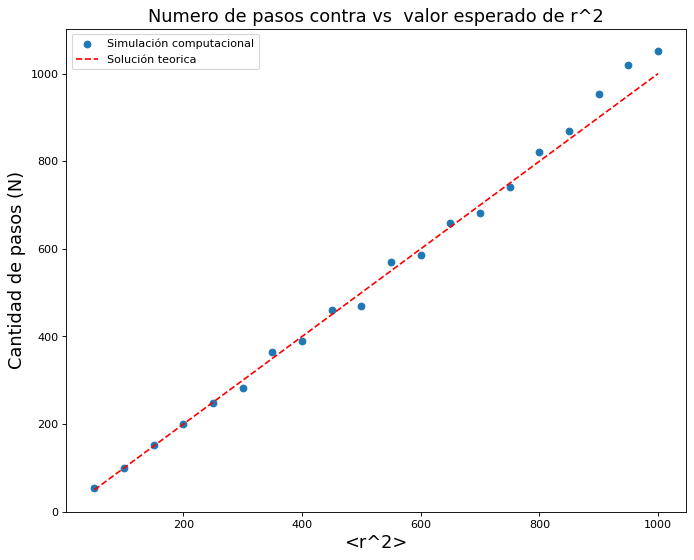

In [70]:
plt.figure(figsize=(10,8), dpi = 80)
plt.scatter(N_array, Prom_r2, label='Simulación computacional')
plt.plot(np.linspace(50, 1000, 1000), np.linspace(50, 1000, 1000), label='Solución teorica', color = "red", linestyle = "--")
plt.title('Numero de pasos contra vs  valor esperado de r^2', fontsize = 16)
plt.xlabel('<r^2>', fontsize = 16)
plt.ylabel('Cantidad de pasos (N)', fontsize = 16)
plt.legend()

In [75]:
#Calcular el valor del coeficiente de difusión
#t -> tiempo en el que debe dar un paso
#a -> longitud de cada paso

t = 1 #tiempo en el que debe dar un paso
a = 1 #longitud de cada paso
N = 1000

D_com = np.var(Datos)/(2*1000*t)
D_teo = (a)**2/(2*t)
print("Los valores encontramos para el cálculo de los valores teoricos y computacionales del coeficiente de difusión:")
print("")
print ('D_com = ' + str(D_com) + '-> Valor computacional')
print ('D_teo = ' + str(D_teo) + '-> Valor teorico')

Los valores encontramos para el cálculo de los valores teoricos y computacionales del coeficiente de difusión:

D_com = 0.5010125267328-> Valor computacional
D_teo = 0.5-> Valor teorico
